In [5]:
#Using LDA for classification

In [7]:
conda install -c anaconda pandas-datareader

Channels:
 - anaconda
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [8]:
from pandas_datareader import data

[*********************100%%**********************]  4 of 4 completed


<Axes: xlabel='Date'>

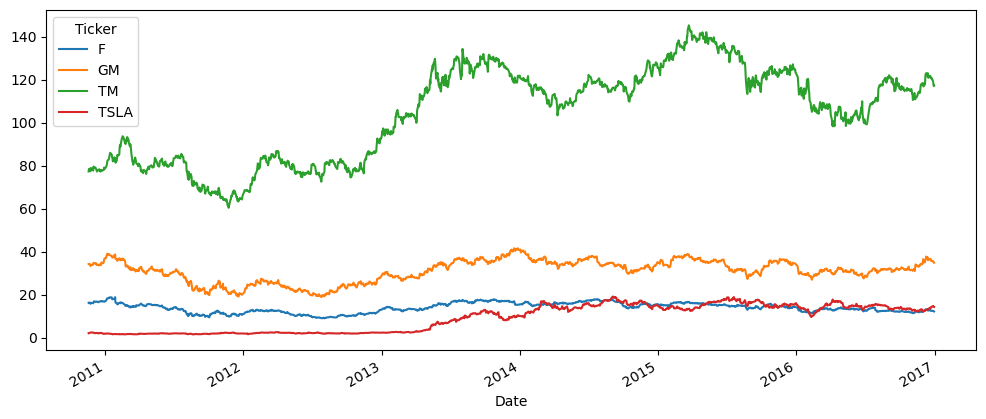

In [11]:
%matplotlib inline
import matplotlib
import yfinance as yf
import pandas as pd

# 设置股票代码和日期范围
tickers = ["F", "TM", "GM", "TSLA"]
first_date = '2009-01-01'
last_date = '2016-12-31'

# 使用 yfinance 获取数据
stock_data = yf.download(tickers, start=first_date, end=last_date)['Close']

# 去除缺失值并绘图
stock_data.dropna().plot(figsize=(12, 5))



In [13]:
conda install matplotlib

Channels:
 - defaults
 - anaconda
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [26]:
# 计算在180天后股价是否上涨的情况
classes = (stock_data.shift(-180) > stock_data).astype(int)

# 将 stock_data 转换为 DataFrame 格式并添加一列表示是否上涨
data = stock_data.stack().to_frame(name='Close')

# 将 classes 也转换为 Series，并将其合并到 data 中
data['is_higher'] = classes.stack()

# 删除包含缺失值的行
data = data.dropna()

# 显示前几行数据
data.head()



Close  is_higher
Date       Ticker                      
2009-01-02 F        2.460000          1
           TM      66.370003          1
2009-01-05 F        2.580000          1
           TM      65.620003          1
2009-01-06 F        2.760000          1

In [34]:
import patsy

# 检查并重命名列以确保列名正确
# data = data.rename(columns={"volume_column_in_original_data": "Volume"})

# 构建设计矩阵
X = patsy.dmatrix("Open + High + Low + Close + Volume + is_higher - 1", data.reset_index(), return_type='dataframe')

# 显示前几行数据
X.head()


PatsyError: Error evaluating factor: NameError: name 'Volume' is not defined
    Open + High + Low + Close + Volume + is_higher - 1
                                ^^^^^^

In [47]:
# 检查特征和目标变量的数据类型
print(X.iloc[:, :-1].dtypes)
print(X.iloc[:, -1].dtype)

# 检查是否有缺失值
print(X.iloc[:, :-1].isnull().sum())
print(X.iloc[:, -1].isnull().sum())

# 转换数据类型（如果需要）
X_features = X.iloc[:, :-1].astype(float)  # 将特征转换为浮点数类型
y_labels = X.iloc[:, -1].astype(str)       # 如果标签是分类，可以转换为字符串类型

# 拟合 LDA 模型
lda = LDA()
lda.fit(X_features, y_labels)


Series([], dtype: object)
float64
Series([], dtype: float64)
0


ValueError: at least one array or dtype is required

In [49]:
from sklearn.metrics import classification_report

# 计算并打印分类报告
print(classification_report(X.iloc[:, -1].values, lda.predict(X.iloc[:, :-1])))


NotFittedError: This LinearDiscriminantAnalysis instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.